In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:

DATASET_PATH = r"C:\Users\GUBBA HARSHITHA\pneumonia_project\dataset\pneumonia_dataset\dataset"
IMG_SIZE = 128  
def load_dataset(dataset_path):
    images = []
    labels = []
    categories = ["normal_CT", "pneumonia_CT"]
    
    for label, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) 
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)


X_train, y_train = load_dataset(os.path.join(DATASET_PATH, "train"))
X_test, y_test = load_dataset(os.path.join(DATASET_PATH, "test"))

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0


y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

print(f"Train dataset shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test dataset shape: {X_test.shape}, Test labels shape: {y_test.shape}")


Train dataset shape: (4407, 128, 128, 1), Train labels shape: (4407, 2)
Test dataset shape: (1102, 128, 128, 1), Test labels shape: (1102, 2)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128, 128, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Block
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Block
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Fourth Convolutional Block (New)
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Fifth Convolutional Block (New)
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Flattening
    Flatten(),

    # Fully Connected Layers
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),

    # Output Layer
    Dense(2, activation='softmax')  # 2 classes: Normal & Pneumonia
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()


C:\Users\GUBBA HARSHITHA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 5,931,266 (22.63 MB)

 Trainable params: 5,929,282 (22.62 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [4]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=32)

# Save model
model.save("pneumonia_detector.h5")


Epoch 1/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5920 - loss: 2.2179 - val_accuracy: 0.6152 - val_loss: 4.9503
Epoch 2/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.8355 - loss: 0.3567 - val_accuracy: 0.6152 - val_loss: 6.4918
Epoch 3/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.9645 - loss: 0.0996 - val_accuracy: 0.6152 - val_loss: 14.1750
Epoch 4/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9680 - loss: 0.0865 - val_accuracy: 0.8448 - val_loss: 0.5914
Epoch 5/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9746 - val_loss: 0.0646
Epoch 6/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9895 - loss: 0.0304 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9955 - loss: 0.0137 - val_accuracy: 0.9946 - val_loss: 0.0146
Epoch 8/70
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.9978 - loss: 0.0063 - val_acc

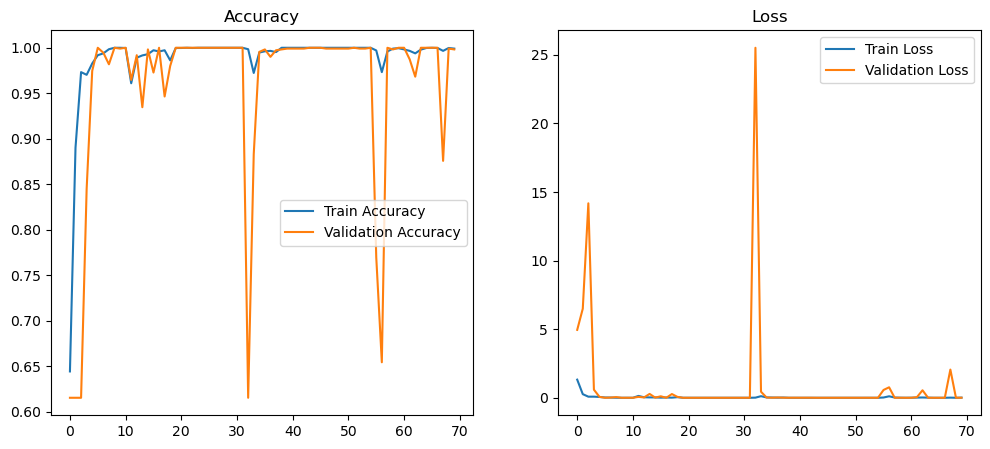

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step
Model Evaluation Results:

Accuracy: 0.9982

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       424
   Pneumonia       1.00      1.00      1.00       678

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102




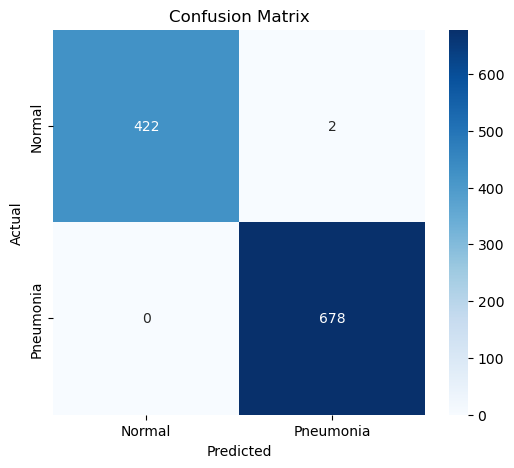

<Figure size 640x480 with 0 Axes>

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # True class labels

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
report = classification_report(y_true_classes, y_pred_classes, target_names=["Normal", "Pneumonia"])

# Print and save results
results_text = f"Model Evaluation Results:\n\n"
results_text += f"Accuracy: {accuracy:.4f}\n\n"
results_text += f"Classification Report:\n{report}\n"

print(results_text)

# Save results to a text file
with open("results.txt", "w") as file:
    file.write(results_text)

# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save confusion matrix
plt.savefig("confusion_matrix.png")


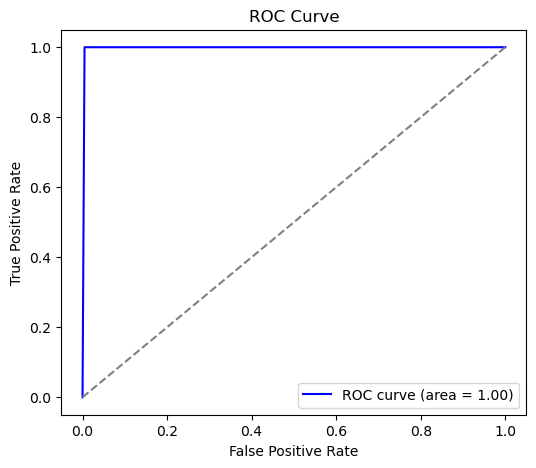

In [12]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
plot_roc_curve(y_true_classes, y_pred_classes)